<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Text(0, 0.5, 'Second Principal Component')

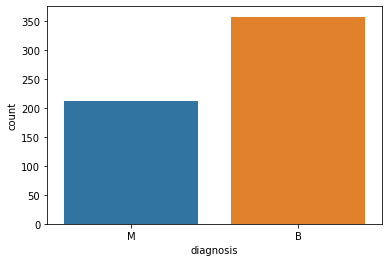

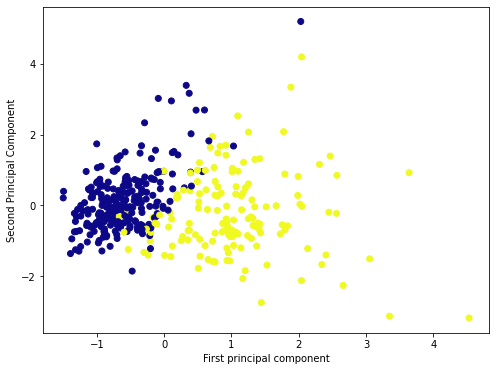

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv')

df.head()

df.shape

df.info()

df.describe()

malignant_count = len(df.loc[df['diagnosis'] == 'M'])
benign_count = len(df.loc[df['diagnosis'] == 'B'])


malignant_count, benign_count


import seaborn as sns
sns.countplot(x = 'diagnosis',data = df)



# checking null values
df.isnull().sum()



# removing unknown column
df.drop('Unnamed: 32',axis = 1, inplace = True)

# categorical to numerical conversion
df1 = df
df1['diagnosis'].replace(['M','B'], [1,0], inplace = True)

df1.shape

# separating feature cols & target
feature_columns = df1.loc[:, df1.columns != 'diagnosis']
target_column = df1['diagnosis']

feature_columns.shape,target_column.shape 



X = feature_columns
y = target_column



### Decomposing large data using Principal Component Analysis, Scaling with StandardScalar



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')



In [2]:
# model fitting with support vector classifier
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [3]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.789
